# SNLP Assignment 4

Name 1: Rricha Jalota <br/>
Student id 1: 7010592 <br/>
Email 1: rrja00001 <br/>


Name 2: Pavle Markovic <br/>
Student id 2: 7007913 <br/>
Email 2: pama00002 <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the Python file for exercise 2. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1: Encodings (3 points)

#### 1.1 (0.5 points)

What are the benefits of having a fixed-width code as opposed to variable-width? e.g. `0011` for `e` and `1111001010` for `Z` (since `e` is much more common than `Z`, this would save some space in variable length encoding).

Imagine that you are given a string in UTF16 (variable-width character encoding). What issues can you encounter? Provide a specific engineering example. 

#### 1.2 (1 point)

The ASCII encoding uses 8 bits per single character. The target alphabet in this case is binary: $\{0, 1\}$. Given a text of length $n$, the encoding takes $n\times 8$ bits in memory (without taking alignment into consideration).

- How would you adapt the ASCII encoding if the target alphabet had three symbols $\{0,1,2\}$?
- How many "trits" (number of symbols from  {0,1,2}) would it take to encode $n$ characters in this new system? Be precise in your mathematical explanation, and be careful which way you round and beware of $\pm 1$ errors.
- The UTF32 encoding uses 32 bits per single character. How does your computation change?


#### 1.3 (1.5 points)

Given the following text, construct a [Huffman tree](https://en.wikipedia.org/wiki/Huffman_coding) and encode it (at character level).

- Show the final tree (ideally as a diagram together with frequency counts). You can work it out on a paper and include a photograph.
- Show the encoded sequence (ideally in comparison to ASCII encoded sequence in binary).
- Compare the length to ASCII encoding (n*8 characters). What improvement did you achieve? Could you expect the same amount of improvement on the entirety of Wikipedia?

```
Three thousand three hundred and thirty-three silver syringes.
```

Treat space as a character as well and `t` and `T` as two different characters.

## Exercise 1 answers:

#### 1.1
- Easier parsing and decoding of the code since codes for all characters are of the same length.
- Consequencially, easier access to N-th character of the code since it is convenient to determine how much is required to skip.
- In variable-width code, a word that contains frequently-occuring characters will have a shorter representation. In contrast, the encoding of a word with infrequently-used letters would be significantly larger in size. In this case where a word can contain any character, fixed-width encoding would work better since all characters would be represented by the same number of bits. With a UTF-16 encoded string, compatibility issues with Byte Order Mark (BOM) may arise. BOM is a sequence of unprintable Unicode bytes, placed at the beginning of the text, which makes it easier for compatible applications to determine the subtype of Unicode format and to define the direction for reading the bytes. This often causes compatibility issues because not all applications know how to handle the BOM. For non-compatible applications, this sequence of bytes is considered as some normal characters in extended ASCII.

#### 1.2
- If consider extended ASCII, reduce number of possible characters to 243, while consider all characters in case of standard ASCII. Therefore, 5 bits would be enough per single character.
- Given a text of length $n$, the encoding will now take $n\times 5$ bits in memory.
- With UTF32 encoding, $n\times 32$ bits will be used to encode $n$ characters.

#### 1.3

![title](img/tree.jpg)

Encoding with Huffman code:
1011000000011101100101110000101101011110110101001000100101011100000011101100100000111110001001001110100101010100100010010101110000111110011110101011011101110000001110 <br/>110010011011111111100111101110001010011010101001111111000011101100110101111 <br/>
Total length: 241 <br/>
Average character code length: 3.8870967741935485

Encoding with ASCII binary codes:
0101010001101000011100100110010101100101001000000111010001101000011011110111010101110011011000010110111001100100001000000111010001101000011100100110010101100101001000<br/>0001101000011101010110111001100100011100100110010101100100001000000110000101101110011001000010000001110100011010000110100101110010011101000111100100101101011101000110<br/>10000111001001100101011001010010000001110011011010010110110001110110011001010111001000100000011100110111100101110010011010010110111001100111011001010111001100101110<br/>
Total length: 496 <br/>
Average character code length: 8

- Both the total length of the encoded sequence and average length of character code with Huffman code are more then 2 times smaller then with ASCII binary code.
- In the case of ASCII code average length of word code is 8, while in the case of Huffman code we can expect it to be around $log(n)$ where $n$ is the number of words in vocabulary. Considering standard ASCII table as the vocabulary with 128 characters, average Huffman code length would be around 7 bits. Therefore, we could expect shorter code, but nowhere near factor of 2. On a wikipidea article, there would not be such a significant improvement because a wikipedia artcile will typically have more unique characters. This means, ASCII encoding of 8 bits would be better utilized. 

## Exercise 2: Conditional Entropy of DNA (7 points)
In this exercise, we will see how conditional entropy is calculated for genome sequences. Read the instructions given below carefully.

### 2.0 Getting started with biopython

1. **Installing biopython** <br/>
Install [biopython](https://biopython.org/) to your local Python environment. Dependencies should be installed automatically. <br/>
The installation instructions for biopython are given in the attached link. A simple pip installation does the trick. 
2. **Saving data files**  <br/>
Download the genome of *Drosophila melanogaster* from [kaggle](https://www.kaggle.com/mylesoneill/drosophila-melanogaster-genome?select=genome.fa). For this, you wil need to create an account on kaggle. <br/> 
To save the data files you download, create a folder called `data` and save the csv and fasta files directly in this folder, since the same path will be used for retrieving the relevant files, as you can see below in the provided code. Conversely, you can simply rename the `archive` folder as `data`. 
3. **How to read a fasta file**  <br/>
As your first task, you have to sample a reduced version of the genome using the pre-implemented `sample_records` function in `exercise_2.py`. The function will write the reduced genome to a [fasta](https://en.wikipedia.org/wiki/FASTA_format) file. <br/>
Biopython can be imported in your Python file with the statement `import Bio`. 
For reading fasta files, look up how to utilise biopython's SeqIO module for parsing the file structure to read genome information in the form of sequences. The result should be akin to reading a list of sentences from a text file. Check the `sample_records` function for further guidance. 
4. **Understanding genome sequences** <br/>
Parsing the fasta file results in an [iterator](https://wiki.python.org/moin/Iterator) of sequence records for the genomes in a class called SeqRecord. <br/>
Structure: *SeqRecord* <br/>
Elements: <br/>
o Meta-features of the sequence (*Name*, *Id*, *Description*, *Number of features*) <br/>
o The actual sequence of nucleotides (*Seq*) <br/>
These sequences comprise chains formed of the same basic building blocks - the nucleotides A, G, C, T. You will observe that these sequences are case sensitive i.e. they contain both uppercase and lowercase chains. We will explicitly tell you what they mean and how to handle them over the course of this exercise. <br/>
5. **Processing genome sequences** <br/>
We can deal with the obtained sequences as if they were normal Python strings. Your goal is to first combine all these sequences into a continuous string of nucleotides, and then extract k-mers from this final "text" corpus.
5. **Difference between k-mers and n-grams** <br/>
For all intents and purposes, k-mers are to genome sequences what n-grams are to word sequences.

In [1]:
# 2.0 Sample a reduced version of the genome
from importlib import reload
from pathlib import Path

import exercise_2
exercise_2 = reload(exercise_2)

N = 100

genome_loc = Path("data/genome.fa")
genome_red_loc = Path("data/genome_reduced.fa")

exercise_2.sample_records(genome_loc, genome_red_loc, N)

### 2.1: K-mers (0.5 points) 

[k-mers](https://en.wikipedia.org/wiki/K-mer) are sequences of nucleotides of length $k$. You can see them as the DNA variant of n-grams, only with nucleotides as its "words".

Implement the function `get_k_mers` that assembles sequences of nucleotides from the fasta file produced in 2.0. For now, convert all characters to uppercase.

e. g. for a sequence
```
GTAGAGCTGT
```
The 2-mers to be sampled are, just as in a bigram language model:
```
GT, TA, AG, GA, AG, GC, CT, TG, GT
```
This example is taken from the Wikipedia article, see there for higher $k$. 

Now, show the output of the function for $k = 2$, i. e. all 2-mers.

In [2]:
# 2.1 get k-mers
k_mers = exercise_2.get_k_mers(genome_red_loc, 2)
print(k_mers) 

, 'CC', 'CT', 'TC', 'CA', 'AG', 'GA', 'AA', 'AG', 'GT', 'TT', 'TC', 'CT', 'TT', 'TA', 'AG', 'GA', 'AC', 'CT', 'TT', 'TT', 'TA', 'AA', 'AA', 'AT', 'TC', 'CT', 'TA', 'AT', 'TA', 'AT', 'TT', 'TA', 'AT', 'TT', 'TT', 'TT', 'TT', 'TG', 'GA', 'AT', 'TC', 'CA', 'AA', 'AT', 'TT', 'TG', 'GG', 'GC', 'CA', 'AC', 'CC', 'CA', 'AT', 'TG', 'GC', 'CG', 'GA', 'AA', 'AA', 'AA', 'AA', 'AT', 'TT', 'TC', 'CT', 'TT', 'TG', 'GT', 'TT', 'TT', 'TT', 'TG', 'GC', 'CA', 'AT', 'TT', 'TG', 'GC', 'CC', 'CT', 'TT', 'TA', 'AA', 'AC', 'CG', 'GT', 'TT', 'TA', 'AT', 'TT', 'TA', 'AT', 'TT', 'TA', 'AT', 'TT', 'TT', 'TG', 'GA', 'AA', 'AA', 'AA', 'AT', 'TA', 'AG', 'GA', 'AT', 'TT', 'TA', 'AG', 'GA', 'AA', 'AA', 'AT', 'TA', 'AG', 'GC', 'CC', 'CA', 'AG', 'GA', 'AT', 'TC', 'CT', 'TA', 'AT', 'TG', 'GT', 'TA', 'AC', 'CA', 'AT', 'TA', 'AT', 'TT', 'TC', 'CT', 'TC', 'CA', 'AC', 'CA', 'AA', 'AA', 'AA', 'AA', 'AT', 'TA', 'AA', 'AA', 'AC', 'CT', 'TT', 'TC', 'CA', 'AA', 'AA', 'AA', 'AA', 'AT', 'TG', 'GA', 'AC', 'CT', 'TT', 'TT', 'TA', 'A

### 2.2 K-mer language models (3 points)

*  Implement the function `k_mer_statistics`. It should estimate $K$ language models with k-mer sizes $1,...,K$, and return two probability distributions: <br/>
a) relative k-mer frequencies and <br/>
b) conditional k-mer probabilities. <br/>
As always, you may modify the function signature to suit your needs (but you must comment on the changes you make). (2.5 points) <br/>

 **Hint:** Calculate the relative frequencies up to K, and then use these for calculating the $k^{th}$ level conditional probabilities using the $(k-1)^{th}$ level relative frequencies. (Refer to the formulae you obtained in Assignment 2 Ex. 2.1)
* Plot the probabilites of all k-mers for $K=5$ language models vs their rank, and use the log-log scale on the axes. Do so by implementing the function `plot_k_mers`. Does the curve look similar to the one you obtained for natural language? (0.5 points)

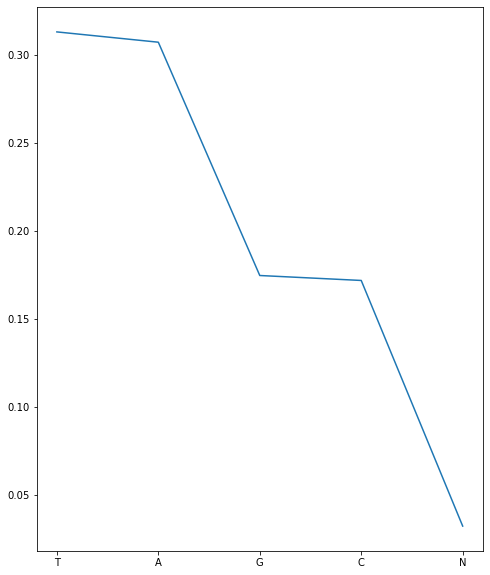

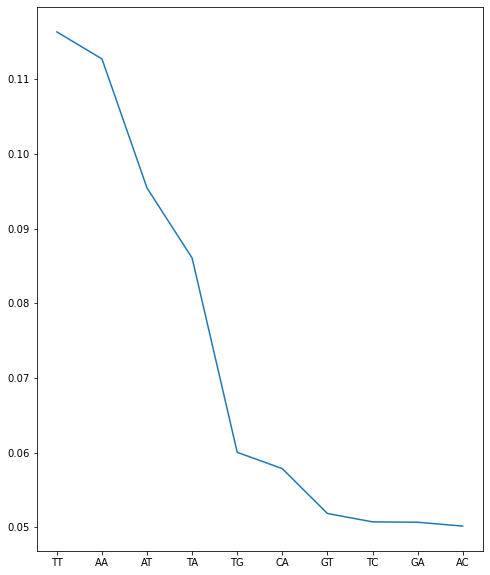

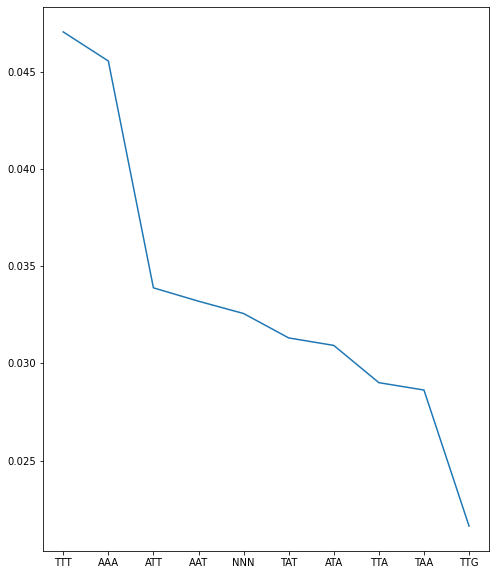

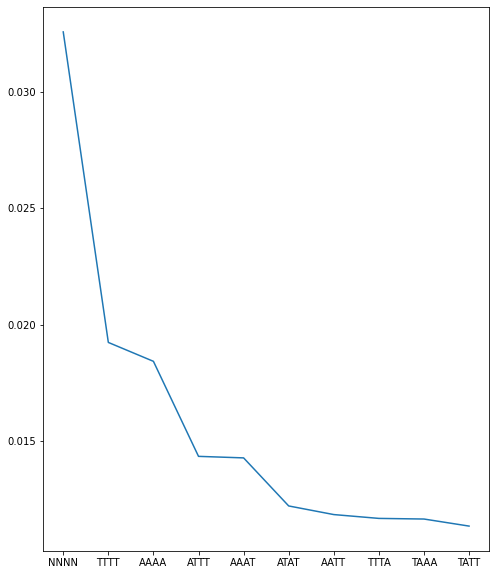

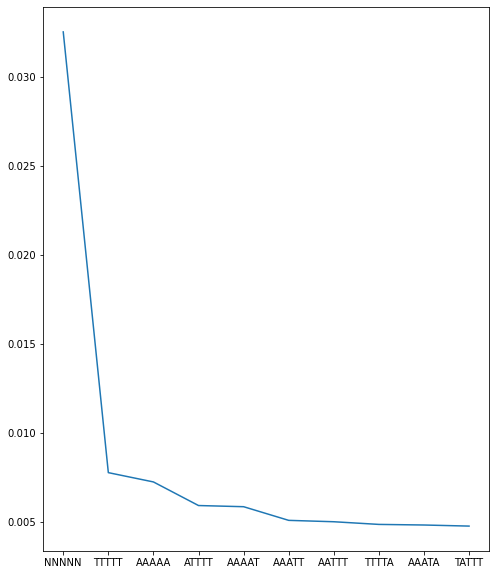

In [3]:
# 2.2 k-mer statistics
rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=5)

# plot
exercise_2.plot_k_mers(rel_freqs)

### 2.3 Conditional entropy (1.5 point)
We want to observe how the conditional entropy of our small DNA corpus changes with increasing k-mer size. Conditional Entropy is defined as

\begin{equation}
H(W|H) = - \sum_{i} p(w_i,h_i) \cdot \log_2p(w_i|h_i)
\end{equation}

Where $p(w_i,h_i)$ is the relative frequency of $(w_i, h_i)$ and $p(w_i|h_i)$ is the conditional probability of $w_i$ given the history $h_i$.  

* What do $w_i$, $h_i$ and the probabilities derived from them correspond to in the context of DNA? (0.5 Points)

* Using your insights from above, implement the function `conditional_entropy`, that calculates the conditional entropy of a k-mer language model. You may modify the function signature as you wish. (0.5 points)

* Estimate up to $K=20$ k-mer language models, calculate their conditional entropies and plot by ascending $k$. What do you observe? (0.5 points)

# Exercise 2.3 answers:
- $w_i$ is a nucleotide, $h_i$ is a history/previous n nucleotides before the nucleotide $i$, conditional probability $p(w_i|h_i)$ is a probability of seeing the nucleotide $w_i$ after $h_i$ nucleotides.
- Entropy decreases as K increases, which might be expected.

1-mer cond. entropy is 2.2753720237891466
2-mer cond. entropy is 1.721797093752371
3-mer cond. entropy is 1.7106610417714385
4-mer cond. entropy is 1.6859422860918107
5-mer cond. entropy is 1.6497785929645248
6-mer cond. entropy is 1.6028615783447826
7-mer cond. entropy is 1.5330054712751622
8-mer cond. entropy is 1.3663065807486288
9-mer cond. entropy is 0.9718135371274941
10-mer cond. entropy is 0.5081211845395918
11-mer cond. entropy is 0.228489788516848
12-mer cond. entropy is 0.10985453417128828
13-mer cond. entropy is 0.06538474151225712
14-mer cond. entropy is 0.050071813391990044
15-mer cond. entropy is 0.04305985090537208
16-mer cond. entropy is 0.039385496967049564
17-mer cond. entropy is 0.03662708081923695
18-mer cond. entropy is 0.03471305102136262
19-mer cond. entropy is 0.032907670942683584
20-mer cond. entropy is 0.03126046879828773


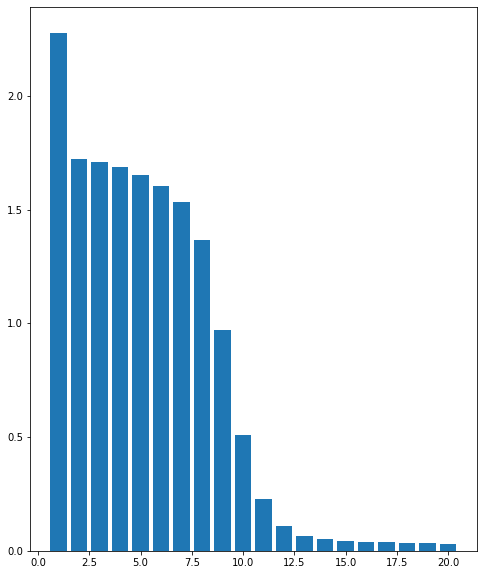

In [3]:
# 2.3 conditional entropy
K = 20

H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=K)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  print("{}-mer cond. entropy is {}".format(k+1, H_k))
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

### 2.4 Tandem repeats (2 points)

A [tandem repeat](https://en.wikipedia.org/wiki/Tandem_repeat) or a mini/microsattelite is a sequence of nucleotides that is repeated multiple times, and the repetitions are immediately adjacent. This example is again taken from the Wikipedia article:

```
ATTCG ATTCG ATTCG
```

In the *Drosophila Melanogaster* genome, tandem repeats are represented by lowercase letters, while the non-repeating sequences are in uppercase. Up to 2.3, we ignored tandem repeats and considered all sequences in uppercase. 

* Read up about tandem repeats, and tell what your expectations about the conditional entropy of tandem repeat regions are as opposed to non-tandem repeat regions (0.5 points)

* Implement the functions `get_k_mers_24` and `k_mer_statistics_24` and sample the same language models as in 2.2, but this time exclusively on tandem repeats or non-tandem repeats. This should yield two sets of language models $LM_{TR}$ and $LM_{\neg TR}$. (1 point)

* Calculate the conditional entropies of both $LM_{TR}$ and $LM_{\neg TR}$. Plot the conditional entropies vs. increasing $K$ as in 2.3. Do you observe any difference? Does it follow your expectation from above? (0.5 points)

# Exercise 2.4 answers:
- We expect that conditional entropy of tandem repeat regions be lower then for non-tandem repeat due to repetition, meaning that model should be more certain to predict next nucleotides.
- However, it can be observed that entropies of non-tandem repeats drops much faster and overall are lower, then for tandem repeat, which doesn't align with our expections.

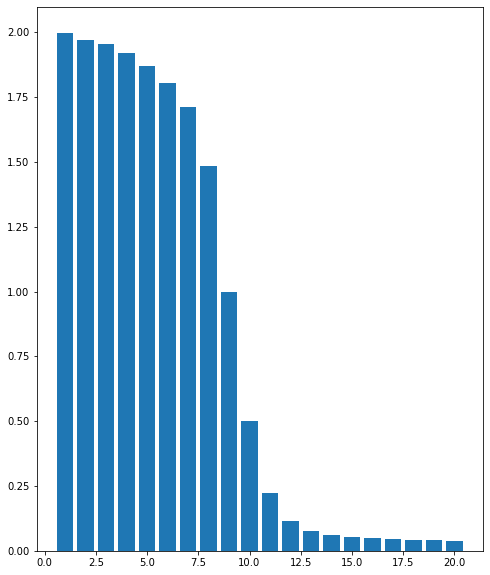

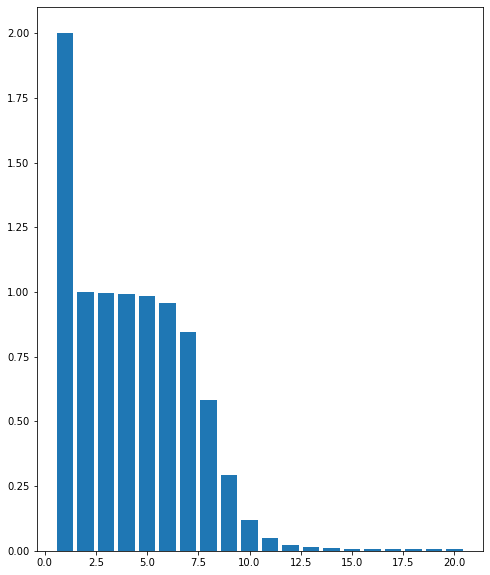

In [4]:
# 2.4.1 tandem repeats
H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics_24(genome_red_loc, K, tandem_repeats=True)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

# 2.4.2 non tandem repeats
H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics_24(genome_red_loc, K, tandem_repeats=False)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

## Bonus (1.5 points)

The standard Huffman encoding uses a binary target alphabet $\{0,1\}$. Assume that you're given a text in alphabet $\Sigma$ and you compress one input symbol from the alphabet at a time.

- Could you adapt the algorithm so that it utilizes three output symbols $\{0,1,2\}$?
- What about $k$ target symbols ($k < $ alphabet size)?
-  What would happen if you used $\Sigma$ as the output alphabet for Huffman encoding? Would the text remain the same? Would it have the same length?
- What changes if the input is words (i.e. sequences from the $\Sigma$ alphabet with one symbol representing the word boundary)?
- What changes if you are allowed to use phrases (i.e. ignore the word boundary) if it helps compression?

Answer these questions in 1-2 sentences max.